In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###Importing Liberaries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

### Data Load

In [4]:
data = pd.read_csv(r'/content/drive/MyDrive/heart_failure_clinical_records_dataset.csv')

### Data Exploratory

In [5]:
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [6]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [8]:
data.isnull().sum()

,0
age,0
anaemia,0
creatinine_phosphokinase,0
diabetes,0
ejection_fraction,0
high_blood_pressure,0
platelets,0
serum_creatinine,0
serum_sodium,0
sex,0


In [9]:
data.duplicated().sum()

np.int64(0)

In [10]:
labels = ["40-45", "46-50", "51-55", "56-60", "61-65", "66-70", "71-75", "76-80", "81-95"]
data['age_group'] = pd.cut(data['age'], bins=[40, 45, 50, 55, 60, 65, 70, 75, 80, 95], labels=labels)

### Data Visualization

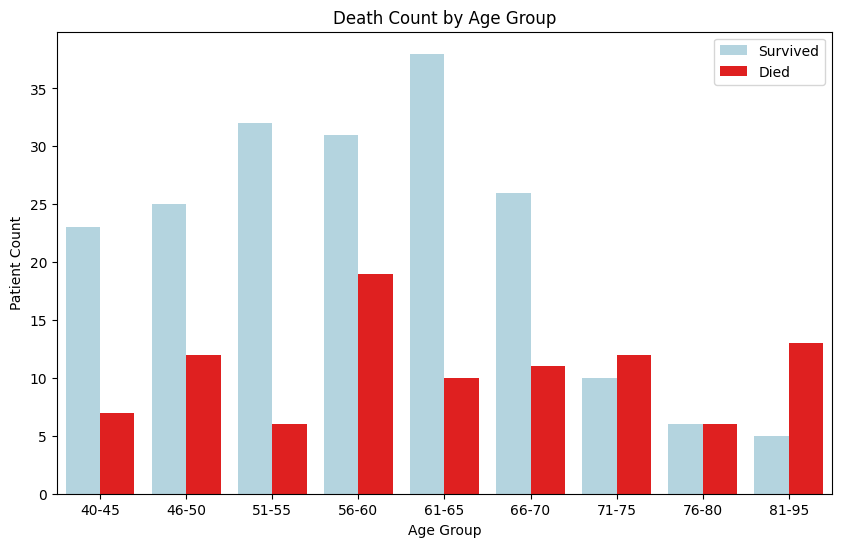

In [11]:
plt.figure(figsize=(10,6))
sns.countplot(data=data, x='age_group', hue='DEATH_EVENT', palette=["lightblue", "red"])
plt.title("Death Count by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Patient Count")
plt.legend(["Survived", "Died"])
plt.show()

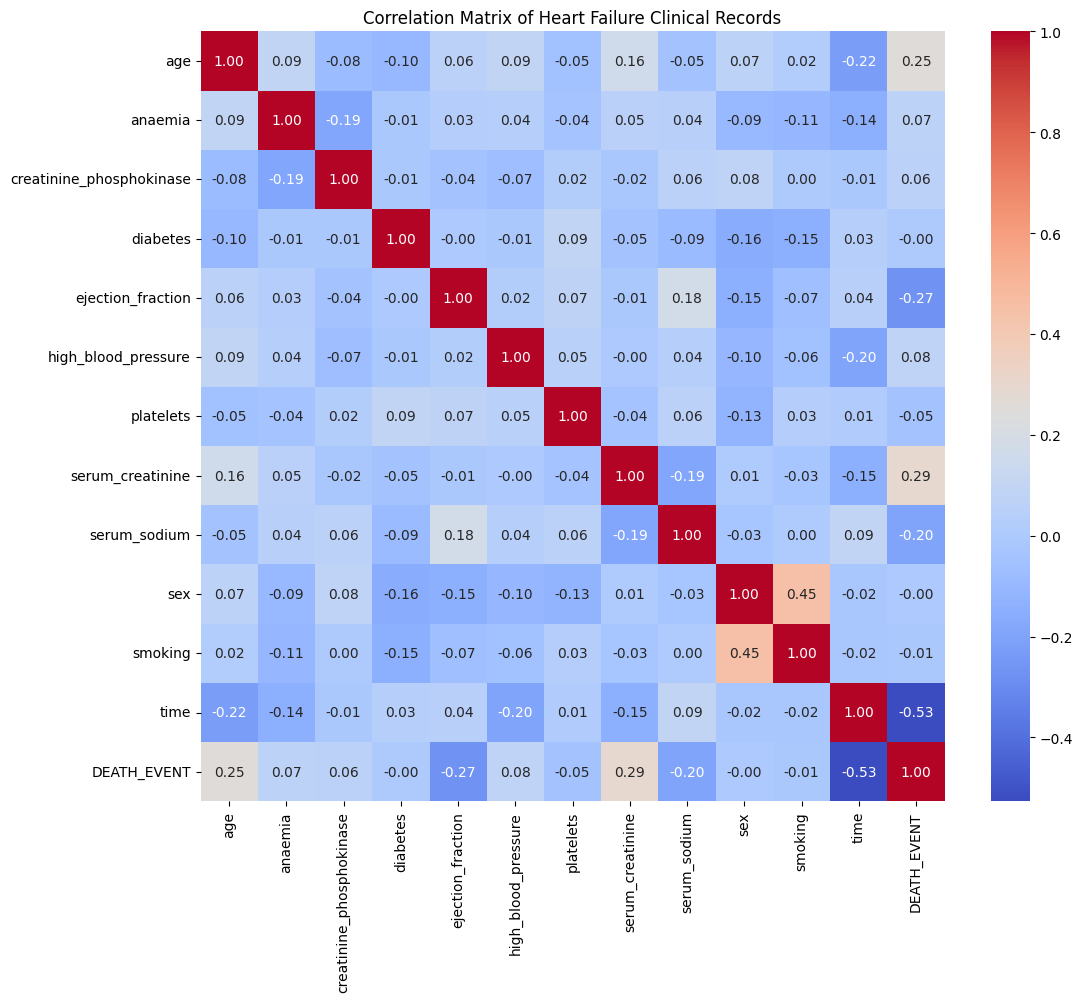

In [14]:
corr_matrix = data.drop(columns=['age_group']).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Heart Failure Clinical Records')
plt.show()

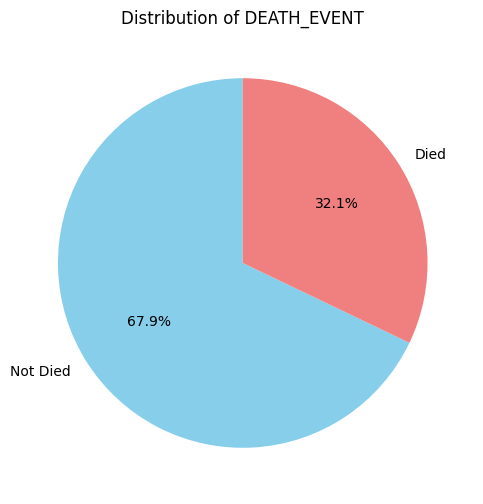

In [15]:
death_counts = data['DEATH_EVENT'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(death_counts, labels=['Not Died', 'Died'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of DEATH_EVENT')
plt.show()

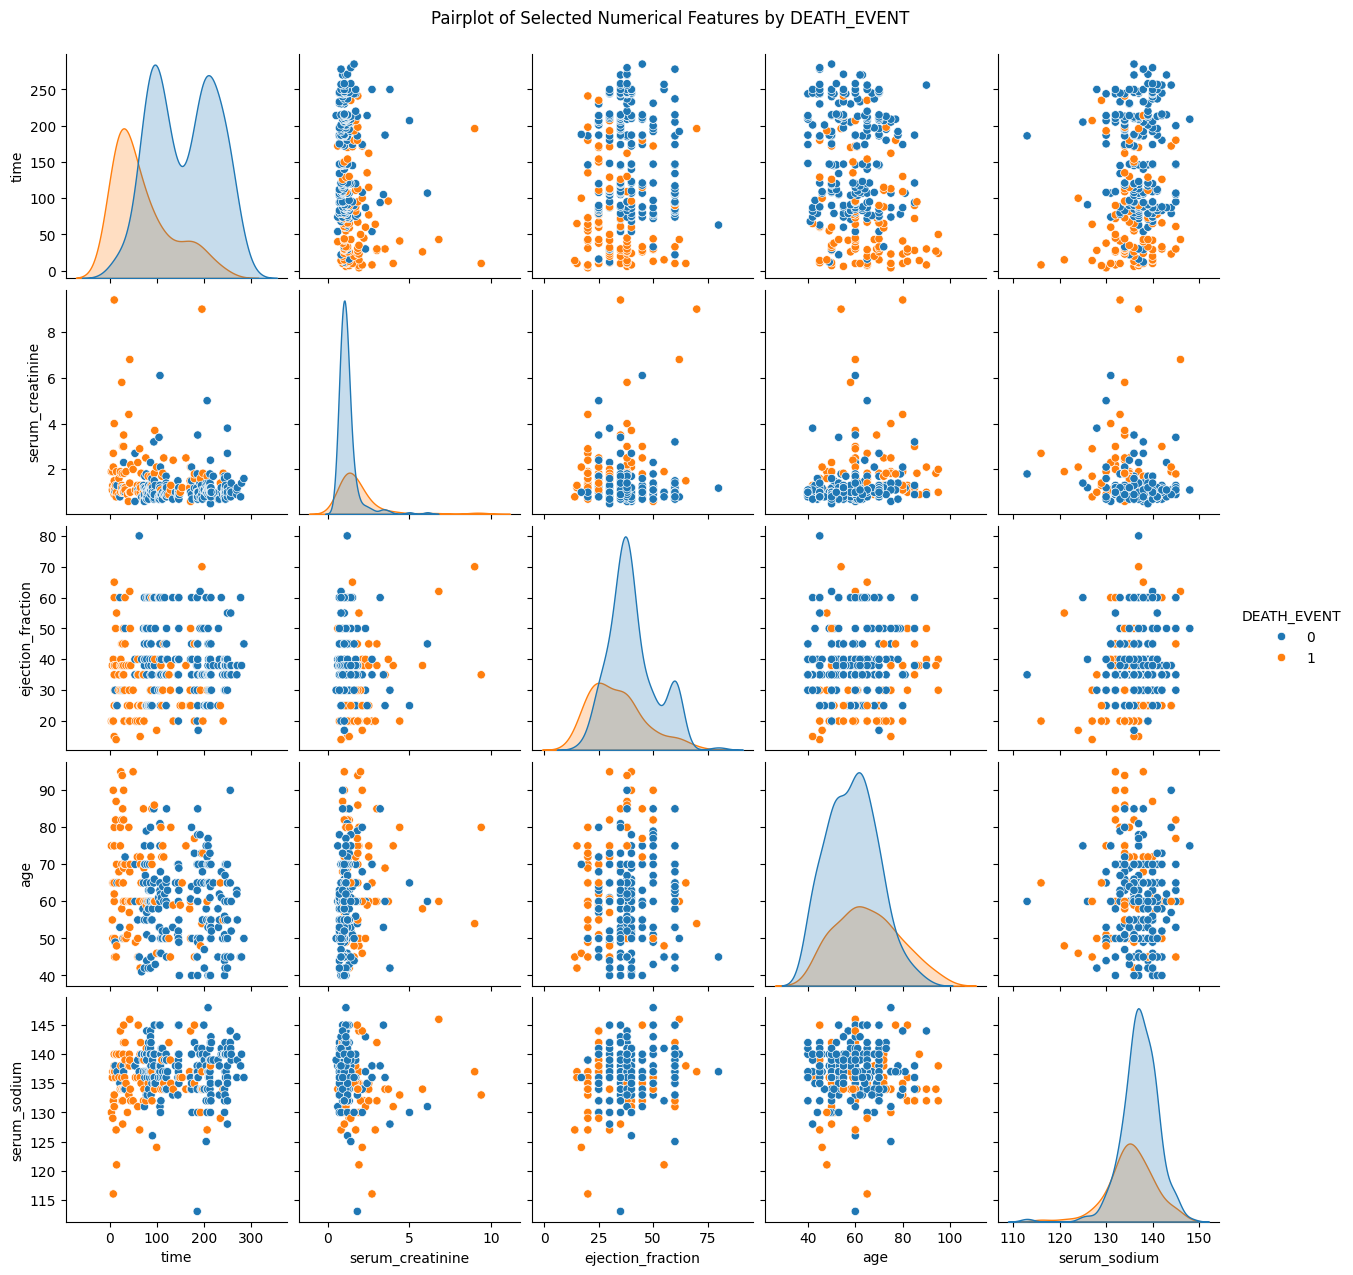

In [16]:
# Select a subset of numerical features that showed some correlation with DEATH_EVENT
selected_features = ['time', 'serum_creatinine', 'ejection_fraction', 'age', 'serum_sodium', 'DEATH_EVENT']

sns.pairplot(data[selected_features], hue='DEATH_EVENT', diag_kind='kde')
plt.suptitle('Pairplot of Selected Numerical Features by DEATH_EVENT', y=1.02)
plt.show()

# Data Preprocessing

### Data Split


In [17]:
data.drop(columns=['age_group'], inplace=True)

In [18]:
X = data.drop('DEATH_EVENT', axis=1)
y = data['DEATH_EVENT']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Feature Scaling

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
continuous_features = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']
X_train[continuous_features] = scaler.fit_transform(X_train[continuous_features])
X_test[continuous_features] = scaler.transform(X_test[continuous_features])

#Modeling

### Logistic Regression

In [20]:
log_params = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'saga'],
    'max_iter': [1000]
}

log_grid = GridSearchCV(LogisticRegression(random_state=42), log_params, cv=5)
log_grid.fit(X_train, y_train)

print(" Logistic Regression Best Params:", log_grid.best_params_)

 Logistic Regression Best Params: {'C': 0.1, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}


####Evaluation

In [21]:
log_model = LogisticRegression(
    penalty='l2',
    C=0.1,
    solver='lbfgs',
    max_iter=1000,
    random_state=42
)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
print(" Logistic Regression")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log):.4f}")
print(classification_report(y_test, y_pred_log))

 Logistic Regression
Accuracy: 0.8333
              precision    recall  f1-score   support

           0       0.82      0.98      0.89        41
           1       0.91      0.53      0.67        19

    accuracy                           0.83        60
   macro avg       0.86      0.75      0.78        60
weighted avg       0.85      0.83      0.82        60



### Random Forest

In [22]:
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5)
rf_grid.fit(X_train, y_train)

print(" Random Forest Best Params:", rf_grid.best_params_)


 Random Forest Best Params: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}


####Evaluation

In [23]:
rf_model = RandomForestClassifier(
    n_estimators=50, max_depth=5,
    min_samples_leaf=2, min_samples_split=5,
    random_state=42
)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print(" Random Forest")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(classification_report(y_test, y_pred_rf))


 Random Forest
Accuracy: 0.8500
              precision    recall  f1-score   support

           0       0.85      0.95      0.90        41
           1       0.86      0.63      0.73        19

    accuracy                           0.85        60
   macro avg       0.85      0.79      0.81        60
weighted avg       0.85      0.85      0.84        60



### SVM

In [24]:
svm_params = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

svm_grid = GridSearchCV(SVC(probability=True, random_state=42), svm_params, cv=5)
svm_grid.fit(X_train, y_train)

print(" SVM Best Params:", svm_grid.best_params_)

 SVM Best Params: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


#### Evaluation

In [26]:
svm_model = SVC(
    C=0.1, gamma='scale', kernel='linear',
    probability=True, random_state=42
)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print("\n SVM")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print(classification_report(y_test, y_pred_svm))


 SVM
Accuracy: 0.8333
              precision    recall  f1-score   support

           0       0.83      0.95      0.89        41
           1       0.85      0.58      0.69        19

    accuracy                           0.83        60
   macro avg       0.84      0.77      0.79        60
weighted avg       0.83      0.83      0.82        60



### MLP

In [27]:
mlp_params = {
    'hidden_layer_sizes': [(64,), (64, 32), (128, 64)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001],
    'learning_rate': ['constant', 'adaptive']
}

mlp_grid = GridSearchCV(MLPClassifier(max_iter=1000, random_state=42), mlp_params, cv=5)
mlp_grid.fit(X_train, y_train)

print(" MLP Best Params:", mlp_grid.best_params_)


 MLP Best Params: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (64, 32), 'learning_rate': 'constant'}


#### Evaluation

In [28]:
mlp_model = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation='tanh',
    alpha=0.0001,
    learning_rate='constant',
    max_iter=1000,
    random_state=42
)
mlp_model.fit(X_train, y_train)
y_pred_mlp = mlp_model.predict(X_test)
print("\n MLP Neural Network")
print(f"Accuracy: {accuracy_score(y_test, y_pred_mlp):.4f}")
print(classification_report(y_test, y_pred_mlp))


 MLP Neural Network
Accuracy: 0.6833
              precision    recall  f1-score   support

           0       0.75      0.80      0.78        41
           1       0.50      0.42      0.46        19

    accuracy                           0.68        60
   macro avg       0.62      0.61      0.62        60
weighted avg       0.67      0.68      0.68        60



### XGBoost

In [29]:
xgb_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2]
}

xgb_grid = GridSearchCV(
    XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    xgb_params, cv=5
)
xgb_grid.fit(X_train, y_train)

print(" XGBoost Best Params:", xgb_grid.best_params_)


 XGBoost Best Params: {'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 50}


#### Evaluation

In [30]:
xgb_model = XGBClassifier(
    n_estimators=50,
    max_depth=4,
    learning_rate=0.2,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print("\n XGBoost")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print(classification_report(y_test, y_pred_xgb))


 XGBoost
Accuracy: 0.8333
              precision    recall  f1-score   support

           0       0.83      0.95      0.89        41
           1       0.85      0.58      0.69        19

    accuracy                           0.83        60
   macro avg       0.84      0.77      0.79        60
weighted avg       0.83      0.83      0.82        60



### KNN

In [31]:
knn_params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5)
knn_grid.fit(X_train, y_train)

print(" KNN Best Params:", knn_grid.best_params_)

 KNN Best Params: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}


#### Evaluation

In [32]:
knn_model = KNeighborsClassifier(
    n_neighbors=5,
    weights='uniform',
    metric='euclidean'
)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
print("\n KNN")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(classification_report(y_test, y_pred_knn))


 KNN
Accuracy: 0.7167
              precision    recall  f1-score   support

           0       0.74      0.90      0.81        41
           1       0.60      0.32      0.41        19

    accuracy                           0.72        60
   macro avg       0.67      0.61      0.61        60
weighted avg       0.70      0.72      0.69        60



### Models Accuracies

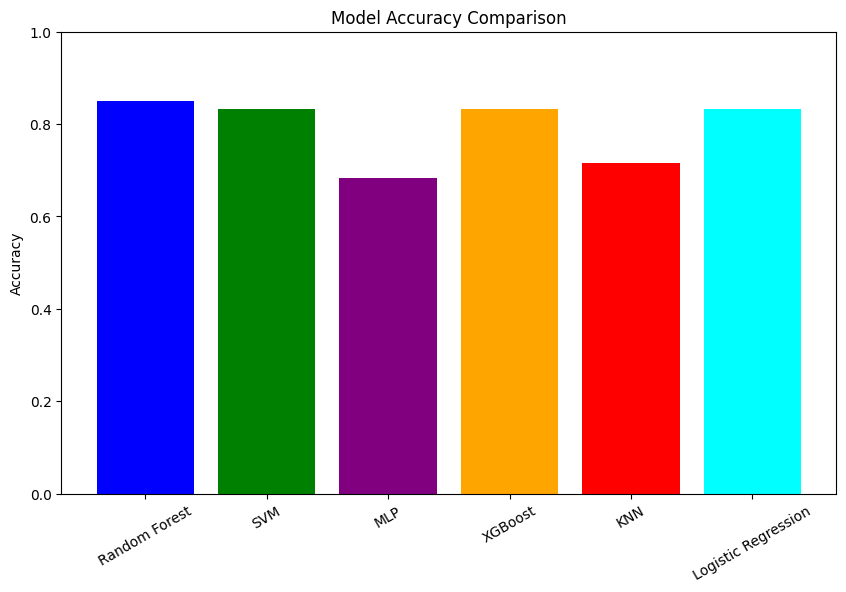

In [33]:
models = [
    'Random Forest', 'SVM', 'MLP',
    'XGBoost', 'KNN', 'Logistic Regression'
]
accuracies = [
    0.85, 0.8333, 0.6833,
    0.8333, 0.7167, 0.8333
]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'purple', 'orange', 'red', 'cyan'])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')

plt.xticks(rotation=30)
plt.show()

In [34]:
import gradio as gr
from sklearn.preprocessing import StandardScaler
import joblib

In [35]:
joblib.dump(rf_model, "heart_model.pkl")
joblib.dump(scaler, "scaler.pkl")
print("Model and scaler saved successfully")

Model and scaler saved successfully


In [36]:
model = joblib.load("heart_model.pkl")
scaler = joblib.load("scaler.pkl")

In [37]:
def predict_heart_risk(age, cpk, ef, platelets, sc, ss, time, anaemia, diabetes, high_bp, sex, smoking):
    data = pd.DataFrame([[
        age, anaemia, cpk, diabetes, ef, high_bp,
        platelets, sc, ss, sex, smoking, time
    ]], columns=[
        'age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
        'ejection_fraction', 'high_blood_pressure', 'platelets',
        'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time'
    ])


    continuous_features = ['age', 'creatinine_phosphokinase', 'ejection_fraction','platelets', 'serum_creatinine', 'serum_sodium', 'time']
    data[continuous_features] = scaler.transform(data[continuous_features])

    prediction = model.predict(data)[0]
    return " At Risk" if prediction == 1 else " Not At Risk"

In [40]:
inputs = [
    gr.Number(label="Age"),
    gr.Number(label="Creatinine Phosphokinase, Range [0,100000]"),
    gr.Number(label="Ejection Fraction, Range [5,85] "),
    gr.Number(label="Platelets, Range [5000,2000000]"),
    gr.Number(label="Serum Creatinine, Range [0.1,60]"),
    gr.Number(label="Serum Sodium, Range [95,255]"),
    gr.Number(label="Follow-up Time (days)"),
    gr.Radio([0, 1], label="Anaemia (0=No, 1=Yes)"),
    gr.Radio([0, 1], label="Diabetes (0=No, 1=Yes)"),
    gr.Radio([0, 1], label="High Blood Pressure (0=No, 1=Yes)"),
    gr.Radio([0, 1], label="Sex (0=Female, 1=Male)"),
    gr.Radio([0, 1], label="Smoking (0=No, 1=Yes)")
]

In [41]:
gr.Interface(
    fn=predict_heart_risk,
    inputs=inputs,
    outputs="text",
    title=" Heart Failure Risk Predictor",
    description="Enter patient data to predict if they are at risk of heart failure.",
    allow_flagging="never"
).launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://328fa2db482d44d053.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
